## CVXPY Installation 

In [1]:
!pip install CVXPY

## Import Libraries

In [2]:
import cvxpy as cp
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib inline

## Helper Functions 


In [3]:
def skew(vector):
    """
    this function returns a numpy array with the skew symmetric cross product matrix for vector.
    the skew symmetric cross product matrix is defined such that
    np.cross(a, b) = np.dot(skew(a), b)

    :param vector: An array like vector to create the skew symmetric cross product matrix for
    :return: A numpy array of the skew symmetric cross product vector
    """
    return np.array([[0, -vector[2], vector[1]], 
                     [vector[2], 0, -vector[0]], 
                     [-vector[1], vector[0], 0]])

## TASK1: Horizontal ground

Stability equations:
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = -mg\\ 
\end{equation}

\begin{equation} 
\begin{bmatrix} 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}\\ 
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} =  0_{3\times1}\\ 
\end{equation}


where $r_{c}$ is center of mass $r_{i}$ are position of the feet, $m$ is the mass of the robot, and $g$ = $\begin{bmatrix}
0\\
0\\
-9.8
\end{bmatrix}$ 

R is skew symmetric cross product matrix for vector such that 
\begin{equation} 
(r_{i}-r_{c}){\times}f_{i} = R f_{i}
\end{equation}

\begin{equation}
R = 
\begin{bmatrix}
0 & -r_{z} & r_{y}\\
r_{z} & 0 & -r_{x}\\
-r_{y} & r_{x} & 0
\end{bmatrix}
\end{equation} \

Problem can be formulated as feasibility problem as follows:\
**Constraints**
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = 
\begin{bmatrix} -mg\\ 0_{3\times1}
\end{bmatrix}
\end{equation}

This can be written as \begin{equation} Af = b \tag{1}\end{equation}

and assuming that the reaction forces lie in the friction cone, with friction coefcient $\mu$

Let the normal to the plane is $n$ = $\begin{bmatrix}
0\\
0\\
1
\end{bmatrix}$ 
so, the tangential orthonormal basis that span the horizontal plane are $t$ = $\begin{bmatrix}
0 & -1\\
1 & 0\\
0 & 0
\end{bmatrix}$ 

\begin{equation} 
\lVert t^Tf_{i} \rVert \leq \mu n^T f_{i} \tag{2}
\end{equation} 


The optimazion problem: 
\begin{aligned} 
\min_{f} \quad & 0\\ 
\textrm{s.t.} \quad & Af = b\\ 
  & \lVert t^Tf_{i} \rVert \leq \mu n^T f_{i}
\end{aligned}

### 1.1 Problem assumptions 

In [4]:
m = 2
g = np.array([0,0,-9.8])
mu = 0.25

### 1.2 Define the horizontal plane  

In [29]:
n = np.array([[0],[0],[1]])
t = scipy.linalg.null_space(n.T)
print("plane orthonormal basis:\n",t)

plane orthonormal basis:
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


### 1.3 Define feet positions and corresponding skew-symmeric matrices
        


In [39]:
r1 = np.dot(t, np.random.randint(5,size=(2,1)))
r2 = np.dot(t, np.random.randint(5,size=(2,1)))
r3 = np.dot(t, np.random.randint(5,size=(2,1)))
r4 = np.dot(t, np.random.randint(5,size=(2,1)))

xc = (r1[0][0] + r2[0][0] + r3[0][0] + r4[0][0])/4
yc = (r1[1][0] + r2[1][0] + r3[1][0] + r4[1][0])/4
zc = (r1[2][0] + r2[2][0] + r3[2][0] + r4[2][0])/4

rc = np.array([[xc],[yc],[zc]])

R1 = skew((r1-rc)[:,0])
R2 = skew((r2-rc)[:,0])
R3 = skew((r3-rc)[:,0])
R4 = skew((r4-rc)[:,0])

# r1 = np.array([0,0,0])
# r2 = np.array([2,0,0])
# r3 = np.array([2,2,0])
# r4 = np.array([0,2,0])
# rc = np.array([1,1,0])

# R1 = skew(r1-rc)
# R2 = skew(r2-rc)
# R3 = skew(r3-rc)
# R4 = skew(r4-rc)

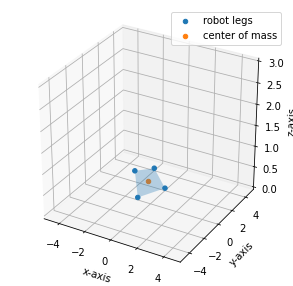

In [40]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

r = np.vstack([r1.T, r2.T, r3.T, r4.T])
# r = np.vstack([r1, r2, r3, r4])
vertices = [list(zip(r[:,0],r[:,1],r[:,2]))]
poly = Poly3DCollection(vertices, alpha=0.3)
ax.add_collection3d(poly)

ax.scatter(xs = r[:,0], ys = r[:,1], zs = r[:,2], alpha=1, label = "robot legs")
ax.scatter(rc[0],rc[1],rc[2], alpha=1, label = "center of mass") 

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,3)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
plt.legend()
plt.show()

### 1.4 Define A, b for the equality constraint

In [41]:
row1 = np.hstack([np.eye(3), np.eye(3), np.eye(3), np.eye(3)])
row2 = np.hstack([R1, R2, R3, R4])
A = np.vstack([row1, row2])
b = np.hstack([-m*g, 0, 0, 0])

### 1.5 Problem solution

In [42]:
f = cp.Variable(12) #f1_x, f1_y, f1_z .... f4_z
obj_function = 0
constraint = [A@f==b]

for i in range(0,12,3): 
  constraint += [cp.norm2(t.T@f[i:i+3]) <= mu*n.T@f[i:i+3]]

obj = cp.Minimize(obj_function)
proj = cp.Problem(obj, constraint)
result = proj.solve()

print("The problem status is", proj.status)
print("The optimal value is", result) # The optimal objective value is returned by `proj.solve()`.
print(f"f1 = {f.value[0:3]}.T") # The optimal value for f is stored in `f.value`.
print(f"f2 = {f.value[3:6]}.T")
print(f"f3 = {f.value[6:9]}.T")
print(f"f4 = {f.value[9:12]}.T")

The problem status is optimal
The optimal value is 0.0
f1 = [0.         0.         4.72265536].T
f2 = [0.         0.         5.02667474].T
f3 = [0.         0.         4.79866021].T
f4 = [0.         0.         5.05200969].T


## TASK2: Tilted ground

To define the titled plane, let's introduce a random normal vector $n$ = $\begin{bmatrix}
0\\
0\\
1
\end{bmatrix} + random(3,1)$  

After that get the normalized_n = $\frac{n}{\lVert n \rVert}$

Then get the tangential orthonormal basis that span the tilted plane $t=NullSpace(n^T)$  \
By taking the left null space of vector n, we will obtain matrix $t_{3\times2} $ 

Generating random positions for the robot feet by making some random linear combinations of t basis as
$r_{i} = t*random(2,1)$  

For the skew symmetric matrix $R_{i} = $\begin{bmatrix} (r_{i}-r_{c}) {\times} \end{bmatrix}

The problem still can be formulated as feasibility problem as follows:\
**Constraints**
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = 
\begin{bmatrix} -mg\\ 0_{3\times1}
\end{bmatrix}
\end{equation}

This can be written as \begin{equation} Af = b \tag{1}\end{equation}

and assuming that the reaction forces lie in the friction cone, with friction coefcient $\mu$

\begin{equation} 
\lVert t^Tf_{i} \rVert \leq \mu n^T f_{i} \tag{2}
\end{equation} 

The optimazion problem: 
\begin{aligned} 
\min_{f} \quad & 0\\ 
\textrm{s.t.} \quad & Af = b\\ 
  & \lVert t^Tf_{i} \rVert \leq \mu n^T f_{i}
\end{aligned}

### 2.1 Problem assumptions 

In [71]:
m = 2
g = np.array([0,0,-9.8])
mu = 2.5

### 2.2 Define the tilted plane  

In [72]:
# Normal vector to a tilted plane
n = np.array([[0],[0],[1]]) + np.random.randn(3,1)
n = n / np.sqrt(np.sum(n**2))
print("normal vector: \nn = ", n.T)

# Orthonormal basis of the tilted plane 
t = scipy.linalg.null_space(n.T)
print("\nplane orthonormal basis:\n",t)

# Check dot product = 0
print("\ndot product(t1.T, t2) = ", np.dot(t[:,0].T, t[:,1]))
print("dot product(n.T, t1) = ", np.dot(n.T, t[:,0])[0])
print("dot product(n.T, t2) = ", np.dot(n.T, t[:,1])[0])

normal vector: 
n =  [[-0.36107214 -0.7153266   0.59827649]]

plane orthonormal basis:
 [[-0.7153266   0.59827649]
 [ 0.62405215  0.31443086]
 [ 0.31443086  0.73701999]]

dot product(t1.T, t2) =  8.326672684688674e-17
dot product(n.T, t1) =  -5.551115123125783e-17
dot product(n.T, t2) =  5.551115123125783e-17


### 2.3 Define feet positions and corresponding skew-symmeric matrices

In [73]:
r1 = np.dot(t, np.random.randn(2,1))
r2 = np.dot(t, np.random.randn(2,1))
r3 = np.dot(t, np.random.randn(2,1))
r4 = np.dot(t, np.random.randn(2,1))

xc = (r1[0][0] + r2[0][0] + r3[0][0] + r4[0][0])/4
yc = (r1[1][0] + r2[1][0] + r3[1][0] + r4[1][0])/4
zc = (r1[2][0] + r2[2][0] + r3[2][0] + r4[2][0])/4

rc = np.array([[xc],[yc],[zc]])

R1 = skew((r1-rc)[:,0])
R2 = skew((r2-rc)[:,0])
R3 = skew((r3-rc)[:,0])
R4 = skew((r4-rc)[:,0])

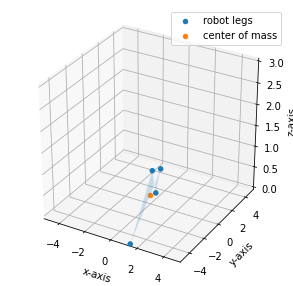

In [74]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

r = np.vstack([r1.T, r2.T, r3.T, r4.T])
vertices = [list(zip(r[:,0],r[:,1],r[:,2]))]
poly = Poly3DCollection(vertices, alpha=0.2)
ax.add_collection3d(poly)

ax.scatter(xs = r[:,0], ys = r[:,1], zs = r[:,2], alpha=1, label = "robot legs")
ax.scatter(xc,yc,zc, alpha=1, label = "center of mass") 

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,3)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
plt.legend()
plt.show()

### 2.4 Define A , b for the equality constraint

In [75]:
row1 = np.hstack([np.eye(3), np.eye(3), np.eye(3), np.eye(3)])
row2 = np.hstack([R1, R2, R3, R4])
A = np.vstack([row1, row2])
b = np.hstack([-m*g, 0, 0, 0])

### 2.5 Problem solution

In [77]:
f = cp.Variable(12) #f1_x, f1_y, f1_z .... f4_z
obj_function = 0
constraint = [A@f==b]

for i in range(0,12,3): 
  constraint += [cp.norm2(t.T@f[i:i+3]) <= mu*n[:,0].T@f[i:i+3]]

obj = cp.Minimize(obj_function)
proj = cp.Problem(obj, constraint)
result = proj.solve()

print("The problem status is", proj.status)
print("The optimal value is", result) # The optimal objective value is returned by `proj.solve()`.
print(f"f1 = {f.value[0:3]}.T") # The optimal value for f is stored in `f.value`.
print(f"f2 = {f.value[3:6]}.T")
print(f"f3 = {f.value[6:9]}.T")
print(f"f4 = {f.value[9:12]}.T")

The problem status is optimal
The optimal value is 0.0
f1 = [0.03753015 0.01855974 4.95826524].T
f2 = [0.00890092 0.00519051 4.93299467].T
f3 = [0.04434614 0.0137798  4.91535817].T
f4 = [-0.09077722 -0.03753005  4.79338192].T


Note that the problem feasibility is not always guaranteed as it depends on the random generated feet positions on the tilted plane.

## TASK3: One foot on a vertical wall

Assuming that 3 feet are standing on a horizontal plane $xy$ and the $4^{th}$ leg pushes against a vertical wall $yz$ plane. \

For the first 3 feet normal vector $n_{1-3}$ = $\begin{bmatrix}
0\\
0\\
1
\end{bmatrix}, t_{1-3} = \begin{bmatrix}
0 & -1\\
1 & 0\\
0 & 0
\end{bmatrix} $

For the $4^{th}$ leg normal vector $n_{4}$ = $\begin{bmatrix}
-1\\
0\\
0
\end{bmatrix}, t_{4} = \begin{bmatrix}
0 & 0\\
1 & 0\\
0 & 1
\end{bmatrix} $


The problem still can be formulated as feasibility problem as follows:\
**Constraints**
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = 
\begin{bmatrix} -mg\\ 0_{3\times1}
\end{bmatrix}
\end{equation}

This can be written as \begin{equation} Af = b \tag{1}\end{equation}

and assuming that the reaction forces lie in the friction cone, with friction coefcient $\mu$ \
for $i = 1,2,3$
\begin{equation} 
\lVert t^T_{1-3}f_{i} \rVert \leq \mu n_{1-3}^T f_{i}\tag{2}
\end{equation} 

for $i = 4$
\begin{equation} 
\lVert t^T_{4}f_{4} \rVert \leq \mu n_{4}^T f_{4}\tag{3}
\end{equation} 

The optimazion problem: 
\begin{aligned} 
\min_{f} \quad & 0\\ 
\textrm{s.t.} \quad & Af = b\\ 
  & \lVert t^T_{1-3}f_{i} \rVert \leq \mu n_{1-3}^T f_{i} \\
  & \lVert t^T_{4}f_{4} \rVert \leq \mu n_{4}^T f_{4}
\end{aligned}

### 3.1 Problem assumption

In [78]:
m = 2
g = np.array([0,0,-9.8])
mu = 0.25

### 3.2 Define the horizontal plane  

In [79]:
n = np.array([[0],[0],[1]])
t = scipy.linalg.null_space(n.T)
print("plane orthonormal basis:\n",t)

plane orthonormal basis:
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


### 3.3 Define feet positions and corresponding skew-symmeric matrices
        


In [80]:
r1 = np.array([0,0,0])
r2 = np.array([-4,0,0])
r3 = np.array([-4,4,0])
r4 = np.array([0,4,4])
rc = np.array([-2,2,0])

R1 = skew(r1-rc)
R2 = skew(r2-rc)
R3 = skew(r3-rc)
R4 = skew(r4-rc)

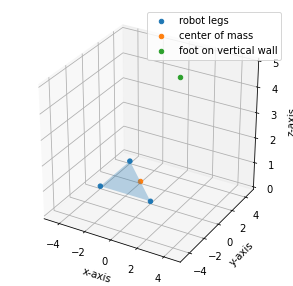

In [81]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

r = np.vstack([r1, r2, r3])
vertices = [list(zip(r[:,0],r[:,1],r[:,2]))]
poly = Poly3DCollection(vertices, alpha=0.3)
ax.add_collection3d(poly)

ax.scatter(xs = r[:,0], ys = r[:,1], zs = r[:,2], alpha=1, label = "robot legs")
ax.scatter(rc[0],rc[1],rc[2], alpha=1, label = "center of mass") 
ax.scatter(r4[0],r4[1],r4[2], alpha=1, label = "foot on vertical wall")

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
ax.legend()
plt.show()

### 3.4 Define A, b for the equality constraint

In [82]:
row1 = np.hstack([np.eye(3), np.eye(3), np.eye(3), np.eye(3)])
row2 = np.hstack([R1, R2, R3, R4])
A = np.vstack([row1, row2])
b = np.hstack([-m*g, 0, 0, 0])

### 3.5 Problem solution

In [83]:
f = cp.Variable(12) #f1_x, f1_y, f1_z .... f4_z
obj_function = 0
constraint = [A@f==b]

for i in range(0,9,3): 
  constraint += [cp.norm2(t.T@f[i:i+3]) <= mu*n.T@f[i:i+3]]

G = np.array([[0,1,0],[0,0,1]])
constraint += [cp.norm2(G@f[9:12]) <= mu*np.array([-1,0,0])@f[9:12]]

obj = cp.Minimize(obj_function)
proj = cp.Problem(obj, constraint)
result = proj.solve()

print("The problem status is", proj.status)
print("The optimal value is", result) # The optimal objective value is returned by `proj.solve()`.
print(f"f1 = {f.value[0:3]}.T") # The optimal value for f is stored in `f.value`.
print(f"f2 = {f.value[3:6]}.T")
print(f"f3 = {f.value[6:9]}.T")
print(f"f4 = {f.value[9:12]}.T")

The problem status is optimal
The optimal value is 0.0
f1 = [ 0.5183811  -0.4807061   7.69696292].T
f2 = [0.0282039  0.02531794 2.16891598].T
f3 = [1.42528175 0.52126707 9.60295078].T
f4 = [-1.97186676 -0.0658789   0.13117032].T


## TASK4: One foot nailed to the floor

Assuming that the feet are standing on a horizontal plane $xy$, then the
normal vector $n$ = $\begin{bmatrix}
0\\
0\\
1
\end{bmatrix}, t = \begin{bmatrix}
0 & -1\\
1 & 0\\
0 & 0
\end{bmatrix} $

But the $4^{th}$ leg is nailed to the ground, so no friction cone for this leg.


The problem still can be formulated as feasibility problem as follows:\
**Constraints**
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = 
\begin{bmatrix} -mg\\ 0_{3\times1}
\end{bmatrix}
\end{equation}

This can be written as \begin{equation} Af = b \tag{1}\end{equation}

and assuming that the reaction forces lie in the friction cone, with friction coefcient $\mu$ \
for $i = 1,2,3$
\begin{equation} 
\lVert t^T_{1-3}f_{i} \rVert \leq \mu n_{1-3}^T f_{i}\tag{2}
\end{equation} 

The optimazion problem: 
\begin{aligned} 
\min_{f} \quad & 0\\ 
\textrm{s.t.} \quad & Af = b\\ 
  & \lVert t^T_{1-3}f_{i} \rVert \leq \mu n_{1-3}^T f_{i} 
\end{aligned}

### 4.1 Problem assumptions 

In [22]:
m = 2
g = np.array([0,0,-9.8])
mu = 0.25

### 4.2 Define the horizontal plane  

In [23]:
n = np.array([[0],[0],[1]])
t = scipy.linalg.null_space(n.T)
print("plane orthonormal basis:\n",t)

plane orthonormal basis:
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


### 4.3 Define feet positions and corresponding skew-symmeric matrices
        


In [24]:
r1 = np.array([0,0,0])
r2 = np.array([-4,0,0])
r3 = np.array([-4,4,0])
r4 = np.array([0,4,-1])
rc = np.array([-2,2,0])

R1 = skew(r1-rc)
R2 = skew(r2-rc)
R3 = skew(r3-rc)
R4 = skew(r4-rc)

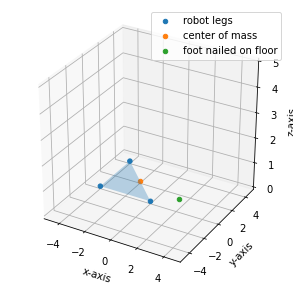

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

r = np.vstack([r1, r2, r3])
vertices = [list(zip(r[:,0],r[:,1],r[:,2]))]
poly = Poly3DCollection(vertices, alpha=0.3)
ax.add_collection3d(poly)

ax.scatter(xs = r[:,0], ys = r[:,1], zs = r[:,2], alpha=1, label = "robot legs")
ax.scatter(rc[0],rc[1],rc[2], alpha=1, label = "center of mass") 
ax.scatter(r4[0],r4[1],r4[2], alpha=1, label = "foot nailed on floor")


ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
ax.legend()
plt.show()

### 4.4 Define A, b for the equality constraint

In [26]:
row1 = np.hstack([np.eye(3), np.eye(3), np.eye(3), np.eye(3)])
row2 = np.hstack([R1, R2, R3, R4])
A = np.vstack([row1, row2])
b = np.hstack([-m*g, 0, 0, 0])

### 4.5 Problem solution

In [27]:
f = cp.Variable(12) #f1_x, f1_y, f1_z .... f4_z
obj_function = 0
constraint = [A@f==b]

for i in range(0,9,3): 
  constraint += [cp.norm2(t.T@f[i:i+3]) <= mu*n.T@f[i:i+3]]

obj = cp.Minimize(obj_function)
proj = cp.Problem(obj, constraint)
result = proj.solve()

print("The problem status is", proj.status)
print("The optimal value is", result) # The optimal objective value is returned by `proj.solve()`.
print(f"f1 = {f.value[0:3]}.T") # The optimal value for f is stored in `f.value`.
print(f"f2 = {f.value[3:6]}.T")
print(f"f3 = {f.value[6:9]}.T")
print(f"f4 = {f.value[9:12]}.T")

The problem status is optimal
The optimal value is 0.0
f1 = [0.04105438 0.04105438 3.31257993].T
f2 = [0.04049262 0.04049262 6.45676973].T
f3 = [0.04105438 0.04105437 3.31257993].T
f4 = [-0.12260137 -0.12260137  6.51807041].T


## TASK5: Applied external force

Assume the external force is given by $f_{e}$ applied at the center of mass\
Stability equations:
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = -mg+f_{e}\\ 
\end{equation}

There is no torque for this external force as it is at the center
\begin{equation} 
\begin{bmatrix} 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}\\ 
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} =  0_{3\times1}\\ 
\end{equation}

Problem can be formulated as feasibility problem as follows:\
**Constraints**
\begin{equation} 
\begin{bmatrix} 
I_{3\times3} & I_{3\times3} & I_{3\times3} & I_{3\times3}\\ 
R1_{3\times3} & R2_{3\times3} & R3_{3\times3} & R4_{3\times3}
\end{bmatrix} \begin{bmatrix} 
f1\\ f2\\ f3\\ f4\\  
\end{bmatrix} = 
\begin{bmatrix} -mg+f_{e}\\ 0_{3\times1}
\end{bmatrix}
\end{equation}

This can be written as \begin{equation} Af = b \tag{1}\end{equation}
This leads to \begin{equation}f=A^{+}b + Nz \tag{2}\end{equation}
where $N$ is the $NullSpace(A)$ and $z$ is the coordinates of $f$ in the basis $N$

Let's introduce $Q$ matrix such that \begin{equation}f=QA^{+}(f_{e}-mg) + QNz \tag{3}\end{equation}

For the friction cone constraint, an approximation is made to represent the cone as a polytope as follows:
\begin{equation} 
\lVert t^Tf_{i} \rVert \leq \mu n^T f_{i} \tag{4}
\end{equation} 

The approximation is $H-representation$ of a polytope
\begin{equation} Cf_{i} \leq D \tag{5} \end{equation} 

thus \begin{equation} c^{T}_{i}f \leq d_{i} \tag{6} \end{equation} 

substitute eq[3] into eq[6], this leads to \begin{equation}c^{T}_{i}(QA^{+}(f_{e}-mg) + QNz)  \leq d_{i} \tag{7} \end{equation}

\begin{equation}c^{T}_{i}QA^{+}f_{e} + c^{T}_{i}QNz  \leq d_{i} +c^{T}_{i}QA^{+}mg \tag{8} \end{equation} \

Let $h = d_{i} +c^{T}_{i}QA^{+}mg$, leads to 
\begin{equation}c^{T}_{i}QA^{+}f_{e} + c^{T}_{i}QNz  \leq h \tag{9} \end{equation} \

Given $\lVert Mf_{e}+f_{e,0} \rVert \leq 1$ where M is positive definite matrix, and let $y=Mf_{e}+f_{e,0}$, so

\begin{equation}\lVert y \rVert \leq 1 \tag{10} \end{equation} \
Then
\begin{equation}\ f_{e} = M^{-1}(y-f_{e,0}) \tag{11} \end{equation} \

substitute eq[11] into eq[9], we get the following:
\begin{equation}\ c^{T}_{i}QA^{+}M^{-1}y + c^{T}_{i}QNz  \leq h + c^{T}_{i}QA^{+}M^{-1}f_{e,0} \tag{12} \end{equation} \

It is clear that worst-case scenario corresponds to the largest
value of $c^{T}_{i}QA^{+}M^{-1}y$, meaning that $y$ should align with $c^{T}_{i}QA^{+}M^{-1}$ and have its maximum possible length $1$. From that we conclude that

\begin{equation}\ y = \frac{c^{T}_{i}QA^{+}M^{-1}}{\lVert c^{T}_{i}QA^{+}M^{-1} \rVert} \tag{13} \end{equation} \

substitute eq[13] into eq[12] leads to
\begin{equation}\ \lVert c^{T}_{i}QA^{+}M^{-1} \rVert+ c^{T}_{i}QNz  \leq h + c^{T}_{i}QA^{+}M^{-1}f_{e,0} \tag{14} \end{equation} \

Finally, the constraint can be written as linear constraint in the form of 
\begin{equation}\ c^{T}_{i}QNz  \leq h + c^{T}_{i}QA^{+}M^{-1}f_{e,0} - \lVert c^{T}_{i}QA^{+}M^{-1} \rVert \tag{15} \end{equation} \

The optimazion problem: 
\begin{aligned} 
\min_{f} \quad & 0\\ 
\textrm{s.t.} \quad & Af = b\\ 
  & c^{T}_{i}QNz  \leq h + c^{T}_{i}QA^{+}M^{-1}f_{e,0} - \lVert c^{T}_{i}QA^{+}M^{-1} \rVert
\end{aligned}

## Appendix

In [28]:
# Normal vector to a tilted plane
n = np.array([[0],[0],[1]]) + np.random.randn(3,1)
n = n / np.sqrt(np.sum(n**2))
print("normal vector: \nn = ", n.T)

# Tangential vectors (vectors in the plane)
x = y = 1
z = (-n[0][0]*x - n[1][0]*y)/ n[2][0]
t1 = np.array([[x],[y],[z]])
t1 = t1 / np.sqrt(np.sum(t1**2))
print("\ntangential vector1: \nt1 = ", t1.T)

x, y = 1, 2
z = (-n[0][0]*x - n[1][0]*y)/ n[2][0]
t2 = np.array([[x],[y],[z]])
t2 = t2 / np.sqrt(np.sum(t2**2))
print("\ntangential vector2: \nt2 = ", t2.T)

# Check dot product = 0
print("\ndot product(n.T, t1) = ", np.dot(n.T, t1)[0][0])
print("dot product(n.T, t2) = ", np.dot(n.T, t2)[0][0])

# Tilted plane orthonormal basis  
t2 = t2 - t1*((np.dot(t1.T, t2) / np.dot(t1.T, t1))[0][0])
print("dot product(t1.T, t2) = ", np.dot(t1.T, t2)[0][0])

t = np.hstack([t1,t2])
print("\nplane orthonormal basis:\n",t)

normal vector: 
n =  [[-0.28628025 -0.67764315  0.67737979]]

tangential vector1: 
t1 =  [[0.49844607 0.49844607 0.70929756]]

tangential vector2: 
t2 =  [[0.30326852 0.60653703 0.73494288]]

dot product(n.T, t1) =  -5.551115123125783e-17
dot product(n.T, t2) =  5.551115123125783e-17
dot product(t1.T, t2) =  -9.71445146547012e-17

plane orthonormal basis:
 [[ 0.49844607 -0.18260784]
 [ 0.49844607  0.12066068]
 [ 0.70929756  0.04353225]]
